# Predicting Insurance Premiums

- Our simple dataset contains a data for each person such as 
- Age, Sex, BMI, Children, Smoker, Region and their Expenses

## Task
- To use this info to predict expenses for new customers

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Dataset using DataFrame
insurance=pd.read_csv('C:\\Users\\darsh\\Downloads\\archive\\insurance.csv',header=0);
insurance


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())


Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


In [13]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<AxesSubplot:>

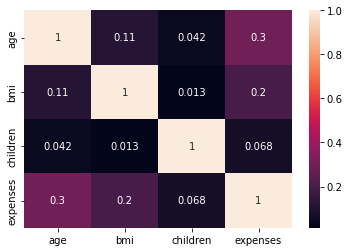

In [14]:
import seaborn as sns
corr_matrix = insurance.corr()
sns.heatmap(corr_matrix, annot = True)

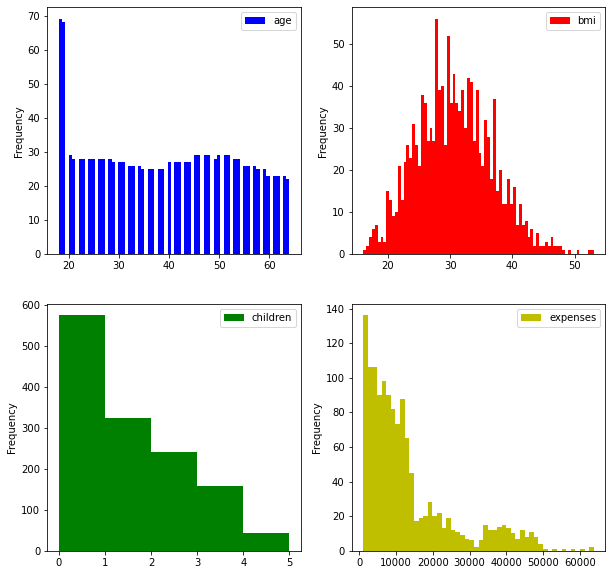

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=80, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=5, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=50 , color="y" , ax=axes[1][1])
plt.show()

<AxesSubplot:>

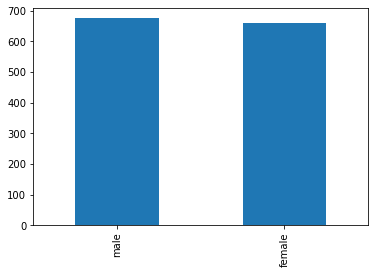

In [16]:
insurance['sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

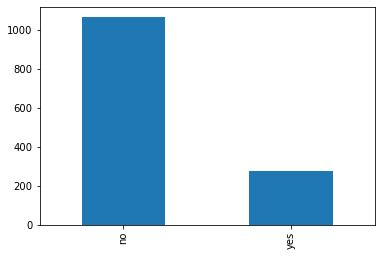

In [17]:
insurance['smoker'].value_counts().plot(kind='bar')

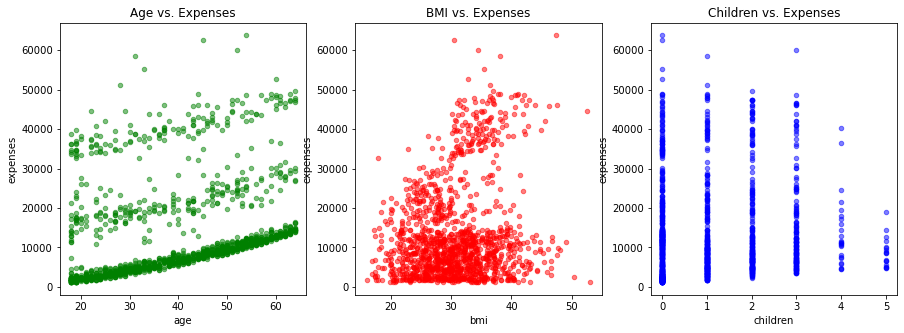

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. Expenses")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="BMI vs. Expenses")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Expenses")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

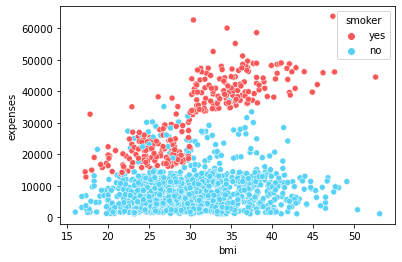

In [19]:
import seaborn as sns  # Importing Seaborn library
pal = ["#FA5858", "#58D3F7"] #COLOR CODE
sns.scatterplot(x="bmi", y="expenses", data=insurance, palette=pal, hue='smoker')

Text(0.5, 1.0, 'Smokers')

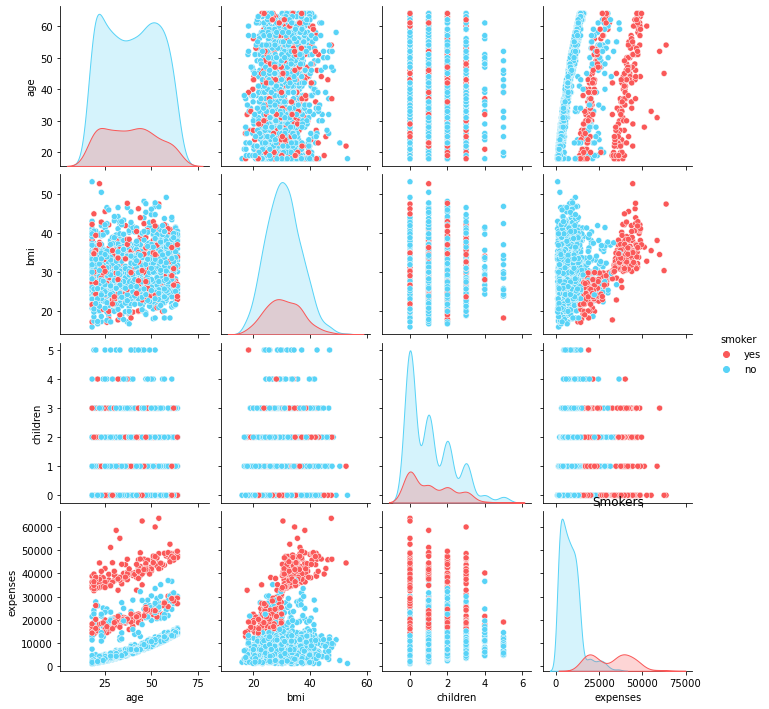

In [20]:
import seaborn as sns


pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

# Preparing Data for Machine Learning Algorithms

In [21]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [22]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
insurance.drop(["region"], axis=1, inplace=True) 
insurance.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [24]:
# Changing categorical values to binary 1s and 0s
insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

insurance.head()

,age,sex,bmi,children,smoker,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


<AxesSubplot:>

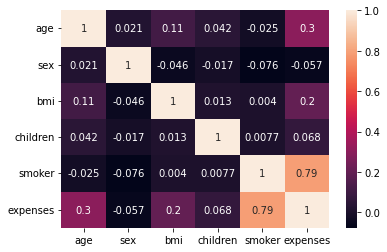

In [25]:
import seaborn as sns
corr_matrix = insurance.corr()
sns.heatmap(corr_matrix, annot = True)

In [26]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses


# Modeling our Data

In [27]:
#Training and Testing..
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from math import sqrt 
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))
print('RMSE for Training:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('RMSE for Testing:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.7978966946106113
RMSE for Training: 6150.385952617393
RMSE for Testing: 5671.039719424828


In [28]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11447.769722
610,8547.69,9940.228804
569,45702.02,37782.689646
1034,12950.07,15941.144968
198,9644.25,6904.401390
...,...,...
1084,15019.76,14548.018799
726,6664.69,8066.242842
1132,20709.02,15530.862695
725,40932.43,33167.676762


In [29]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.148533,-1.015067,0.544940,2.413948,1.971255
1,-1.497808,-1.015067,0.593453,-0.892195,-0.507291
2,-1.142736,0.985157,0.965391,0.760876,1.971255
3,-0.503605,-1.015067,0.722823,0.760876,-0.507291
4,1.342771,0.985157,0.270029,-0.065659,-0.507291


In [31]:
pd.DataFrame(y_train).head()

,expenses
621,40182.25
194,1137.47
240,38511.63
1168,4670.64
1192,13019.16


In [32]:
from sklearn.ensemble import RandomForestRegressor 
# Create a instance for Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13) 
# Fit data to the model
random_forest_reg.fit(X_train, y_train)  

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

### Evaluating Random Forest Regression Model

In [33]:
# For K-Fold Cross Validation,find accuracy with R2 Score,squareroot operation.
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt  

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
from numpy import sqrt
# Prediction with training & testing dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training & testing accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for RFR Model: ", accuracy_RFR_train)
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for RFR Model: ", accuracy_RFR_test)

# Find RMSE for training & testing data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for RFR Model:  0.8810737094617402
Testing Accuracy for RFR Model:  0.8939483596286619
RMSE for Training Data:  4129.165103400073
RMSE for Testing Data:  4108.0401170627365
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8573765551768575


# Testing:-

In [35]:
input_data = {'age': [22],
              'sex': ['male'],
              'bmi': [21],
              'children': [0],
              'smoker': ['yes'],
              'region': ['southwest']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,22,male,21,0,yes,southwest


In [36]:
# Our simple pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,22,0,21,0,1


In [37]:
# Scale our input data  
input_data = sc.transform(input_data)
input_data

array([[-1.21374999, -1.01506676, -1.57348916, -0.89219519,  1.97125461]])

In [38]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-1.21374999, -1.01506676, -1.57348916, -0.89219519,  1.97125461]])

In [39]:
# Get our predicted insurance rate for our new customer
random_forest_reg.predict(input_data)

array([16274.06328525])